In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [3]:
storage_mr = {}
disp = [i*250 for i in range(15)]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    lg_squat_mr = ul.interpnan(df["lg_squat_mr"][idx1-20:idx2+20])
    lg_squat_mr = lg_squat_mr.loc[idx1:idx2].to_numpy()    
    storage_mr[file] = lg_squat_mr
storage_mr = pd.DataFrame(storage_mr)
storage_mr.to_csv(r"D:\PPMI_UA_2021\Database\lg_squat.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


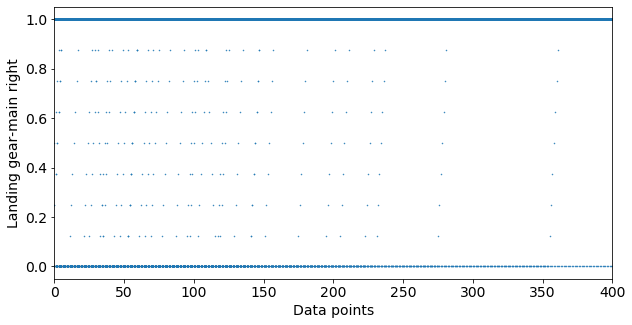

In [5]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\lg_squat.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy(), 'o', markersize=0.5, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Landing gear-main right", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
                 
plt.savefig(r"D:\PPMI_UA_2021\lg_squat.png")

In [3]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\lg_squat.csv")
counter, sampling, duration = 0, 16, 5
max_hdot_mps = 0.8
lg_squat_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    lg_squat = df[file].to_numpy()
    for irow, _ in enumerate(lg_squat):
        if irow >= lg_squat.shape[0] - sampling * duration:
            lg_squat_flag.append(0)
            break
        else:
            flag = lg_squat[irow:irow + sampling * duration] < 0.8
            if sum(flag) >= sampling * duration:
                lg_squat_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["lg_squat"] = lg_squat_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

 153 ... flight_12061 ... Unstable
 772 ... flight_21170 ... Unstable
 949 ... flight_23612 ... Unstable
1147 ... flight_27534 ... Unstable
1561 ... flight_33197 ... Unstable
1848 ... flight_37075 ... Unstable
1901 ... flight_37683 ... Unstable
1946 ... flight_38297 ... Unstable
1959 ... flight_38410 ... Unstable
2067 ... flight_40099 ... Unstable
2237 ... flight_42842 ... Unstable
2323 ... flight_44206 ... Unstable
2710 ... flight_49809 ... Unstable
3114 ... flight_55525 ... Unstable
3507 ... flight_61936 ... Unstable
3542 ... flight_62428 ... Unstable
3569 ... flight_63018 ... Unstable
3598 ... flight_63532 ... Unstable


In [4]:
counter

18